<a href="https://colab.research.google.com/github/susanje/clusteringpractica/blob/main/clasifxjerarquia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wholesale_customers_data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Existen múltiples categorías de productos: frescos, lácteos, abarrotes, etc. Los valores representan la cantidad de unidades compradas por cada cliente para cada producto. Nuestro objetivo es crear clústeres a partir de estos datos que puedan segmentar a clientes similares. Usaremos agrupamiento jerárquico para este problema.

Primero normalizar datos para que todas las variables tengan la misma escala, sino podría sesgarse el modelo

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head() #vemos que la escala de todas las variables es parecida

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


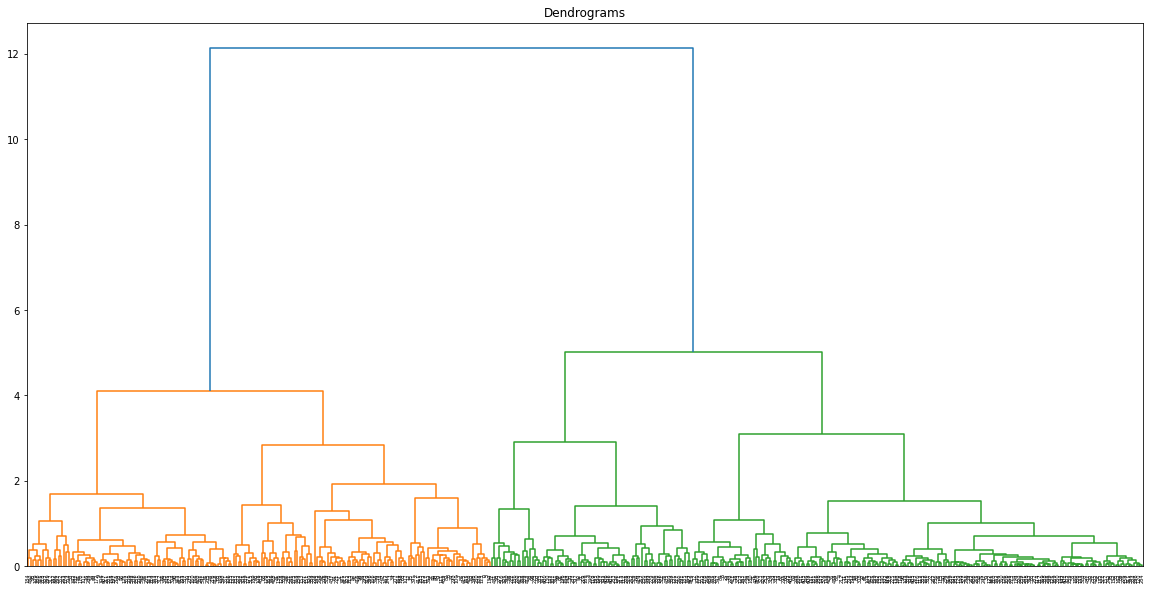

In [ ]:
import scipy.cluster.hierarchy as shc #graficaremos el dendograma para que nos ayude a decidir el numero de grupos para este problema
plt.figure(figsize=(20, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Vemos que el eje x tiene las muestras y el eje y contiene la distancia entre esas muestras, la linea azul muestra la distancia maxima, decidimos el umbral de 6 y cortamos x ahi el dendograma

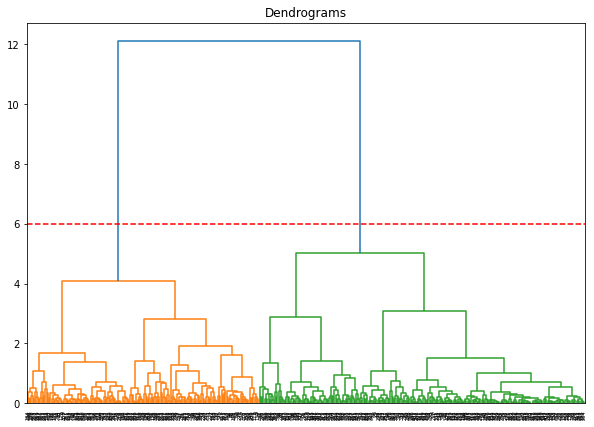

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Vemos como en 6 se grafica la linea punteada que marca el umbral, esto nos indica que van a existir 2 grupos, puesto que la linea roja hace 2 intersecciones.

In [ ]:
from sklearn.cluster import AgglomerativeClustering #aplicamos el agrupamiento jerarquico para 2 clusters
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')#decidimos que el metodo para definir la afinidad va a ser el euclidiano
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Podemos ver los valores de 0 y 1 en la salida ya que definimos 2 clústeres. 0 representa los puntos que pertenecen al primer grupo y 1 representa los puntos del segundo grupo.

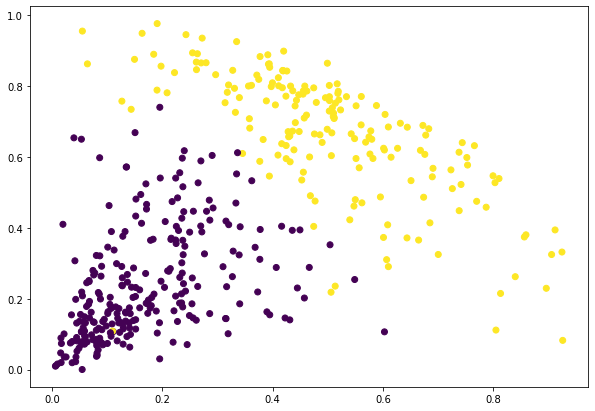

In [ ]:
plt.figure(figsize=(10, 7)) #graficos los 2 clusteres que conformamos
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

Se observa claramente los 2 clusteres formados, como no predefinimos el número de grupos es mejor que k-means
